# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 5

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  60 баллов
* Задача 2 &mdash;  60 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash;  30 баллов
* Задача 4 &mdash;  30 баллов







-----

In [22]:
# Bot check

# HW_ID: phds_hw5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from torch import nn, optim
import matplotlib.pyplot as plt

from IPython.display import clear_output

from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

---
## <b><font color="blue">Легкая часть</font></b>
### Задача 1

#### *Профиль физика*

In [2]:
df = pd.read_csv("physics_data.csv", index_col=0)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,pubchem_id,Eat
0,-54.825075,-0.835719,45.240515,-22.585658,1.450320,-16.223986,12.376342,13.424011,-4.923189,-2.653680,...,-0.023466,-0.066633,0.030779,-0.036064,-0.008572,0.011805,-0.036215,0.052180,25004,-19.013763
1,-34.039832,24.930703,-7.485562,40.737762,21.400170,15.280596,4.467203,-19.296032,-0.433598,18.387221,...,-0.000419,0.003369,-0.000641,-0.001035,0.012597,0.004377,0.004023,0.003356,25005,-10.161019
2,-58.794258,-49.823448,-35.062080,1.698937,-18.012227,12.523468,9.210336,7.488163,11.392693,-0.927953,...,-0.003377,-0.003500,0.002734,-0.001017,0.004774,0.012796,0.022270,0.008051,25006,-9.376619
3,-38.508716,19.211767,-4.858507,10.484105,16.622411,-22.131178,-14.876963,-5.516521,13.793978,3.657935,...,-0.001423,-0.000576,0.011144,-0.007253,-0.006700,-0.007940,0.022492,-0.007016,25009,-13.776438
4,-45.432604,-23.951574,-55.340413,-7.879883,-16.304009,13.340896,11.326496,6.784151,11.208725,-0.181278,...,0.008307,-0.003005,0.000816,-0.000938,0.001135,-0.005256,0.001042,0.002651,25011,-8.537140


Разбейте датасет на признаки и таргет, где в качестве таргета будет использоваться столбец Eat, а признаки - все остальные. В том числе разбейте на подвыборки для обучения и теста.

In [3]:
X, y = df.drop("Eat", axis=1), df["Eat"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Общая часть

Отмасштабируйте данные:

In [5]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Обучите модель линейной регрессии и посмотрите на значения метрик на тесте. Что вы можете сказать про результат обучения?

In [6]:
linreg_model = LinearRegression()

linreg_model.fit(X_train, y_train)
y_pred = linreg_model.predict(X_test)

In [7]:
print(f'r2 score: {r2_score(y_test, y_pred)} \nMAPE: {mean_absolute_percentage_error(y_test, y_pred)}')

r2 score: -5.783035717190791 
MAPE: 0.22445318297473268


MAPE, вроде, ничего, а вот r2 отрицателен. Это значит, что наша модель, по-видимому, плохо соответствует данным

Обучите линейные модели с регуляризациями, которые мы проходили ранее. Для каждой из моделей постройте графики зависимости метрик r2 и MAPE от коэфициента регуляризации. Можно пользоваться кодом из домашнего задания по регуляризации. Сильно ли улучшился результат? 

In [8]:
def show_metrics (model, start_alpha, stop_alpha):
    alphas_grid = np.linspace(start_alpha, stop_alpha, 100)
    r2 = []
    mape = []
    
    for alpha in alphas_grid:
        linreg = model(alpha = alpha)
        
        linreg.fit(X_train, y_train)
        y_pred = linreg.predict(X_test)
        r2.append(r2_score(y_test, y_pred))
        mape.append(mean_absolute_percentage_error(y_test, y_pred))
    
    df = pd.DataFrame({'r2': r2, 'mape': mape, 'a': alphas_grid})
    plt.figure(figsize=(15, 7))
    sns.lineplot(x = 'a',  y = 'mape', data=df, color='r')
    sns.lineplot(x = 'a',  y = 'r2', data=df, color='g')
    return alphas_grid[min((v, i) for i, v in enumerate(mape))[1]], alphas_grid[max((v, i) for i, v in enumerate(r2))[1]]

(0.030303030303030304, 0.030303030303030304)

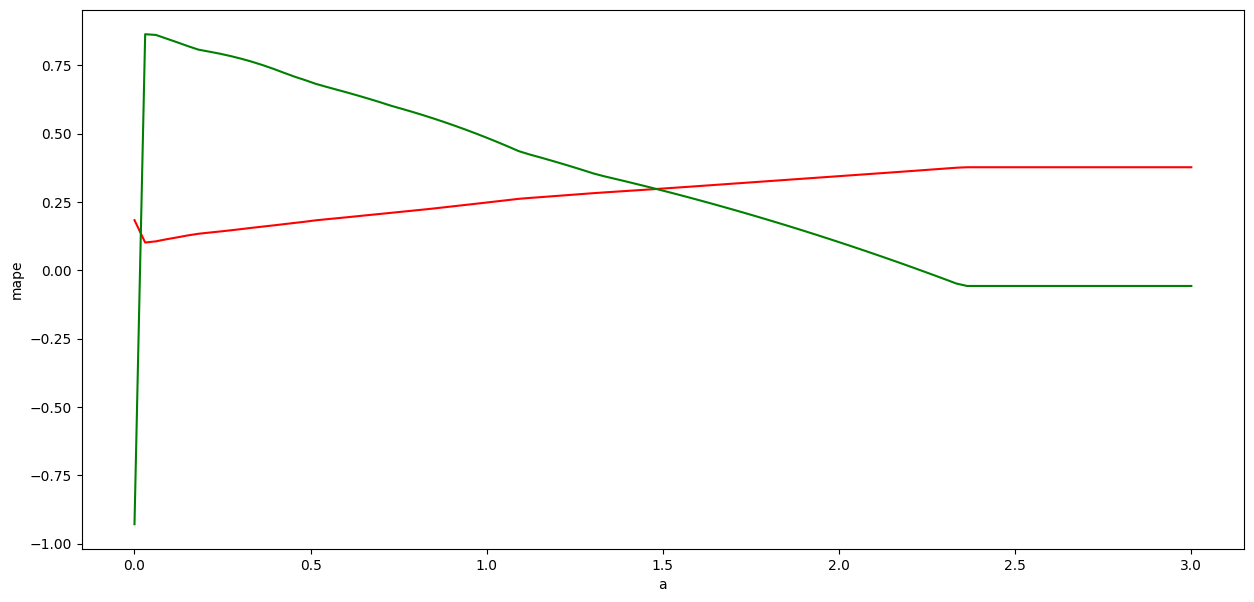

In [9]:
show_metrics(Lasso, 0, 3)

(3.0, 3.0)

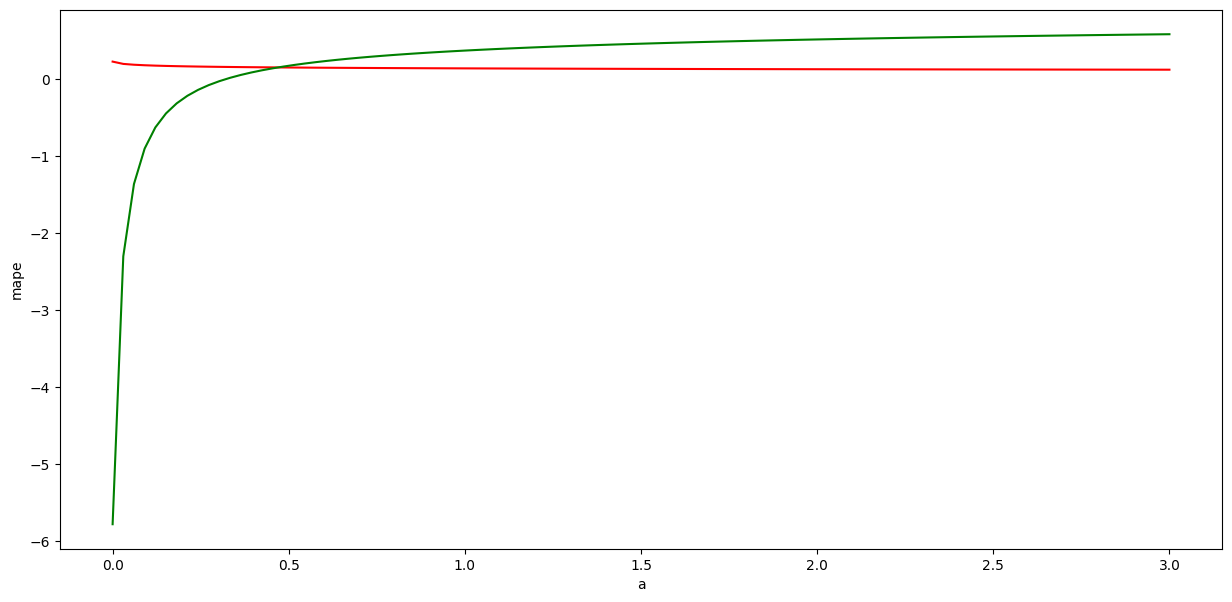

In [10]:
show_metrics(Ridge, 0, 3)

(0.030303030303030304, 0.030303030303030304)

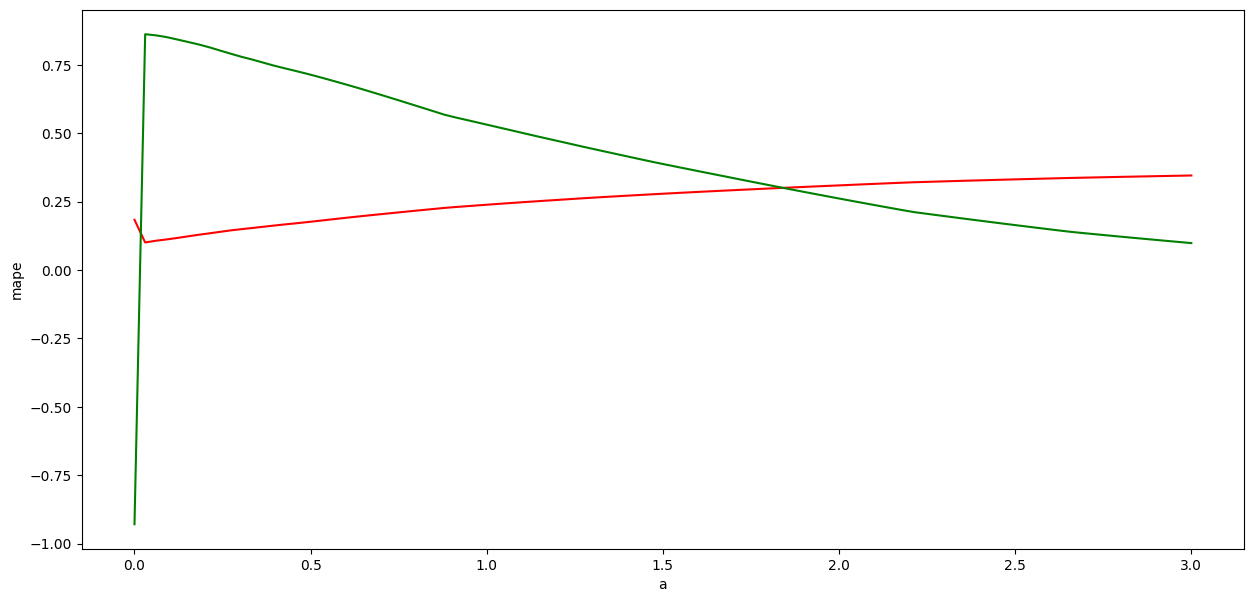

In [11]:
show_metrics(ElasticNet, 0, 3)

Выберите оптимальный, на вашь взгляд, параметр для L1-регуляризации, обучите модель Lasso-регрессии, выведите ещё раз метрики r2 и MAPE и проведите отбор признаков: уберите из датасета все те, для которых коэффициент регуляризации оказался нулевым.

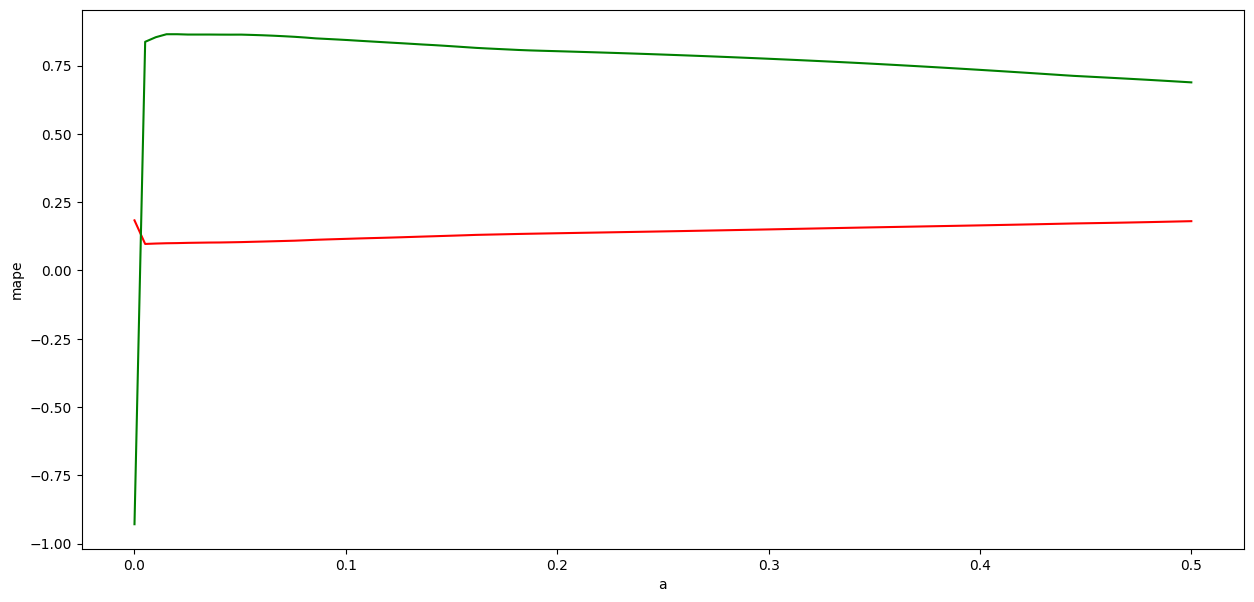

In [12]:
optim_alpha = sum(show_metrics(Lasso, 0, 0.5)) / 2

In [13]:
lasso_model = Lasso(alpha=optim_alpha)

lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

In [14]:
print(f'r2 score: {r2_score(y_test, y_pred)} \nMAPE: {mean_absolute_percentage_error(y_test, y_pred)}')

r2 score: 0.8611280912814936 
MAPE: 0.09869236013490608


In [21]:
filtered_X = X.iloc[:,lasso_model.coef_ == 0]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(filtered_X, y.values, test_size=0.2, random_state=42)

In [26]:
scaler = StandardScaler()

X_train = torch.FloatTensor(scaler.fit_transform(X_train))
X_test = torch.FloatTensor(scaler.transform(X_test))

In [27]:
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

Теперь обучите простейшую нейронную сеть на уменьшенном датасете, сравните результат с результатами обучения других моделей.

In [28]:
n_features = X_train.shape[1]

model = model = nn.Sequential(
    nn.Linear(in_features=n_features, out_features=1),
)

In [29]:
optim_func = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [30]:
for epoch in range(1000):
    y_pred = model(X_train)
    loss = optim_func(y_pred, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

In [32]:
with torch.no_grad():
    y_pred = model(X_test).numpy()

print(f'R2: {round(r2_score(y_test, y_pred), 2)} \nMAPE: {round(mean_absolute_percentage_error(y_test, y_pred), 2)}')

R2: -0.06 
MAPE: 0.3799999952316284


**Вопрос:** объясните полученный результат.

Видим, что нейронка справилась хуже, хотя, козалось бы, почему. Возможно, это из-за метода обучения. В ск лёрне, наверное, используется точное решение, а в секвеншале -- градиентный спуск.

Сравните все модели, поясняя полученные результаты и значения метрик.

**Вывод:** Модель с регуляризацией справилась лучше всего, видимо, она смогла найти зависимые признаки или уменьшить значимость "лишних". Возможно, что более сложная нейронка могла бы справиться и получше, но я не знаю, как подбирать архитектуру сети под конкретную задачу

---
### Задача 2
#### *Профиль физика*

Скачайте [датасет](https://drive.google.com/file/d/1QqYK7Go96vR4l66MShlUuXxY0_FaBcYB/view?usp=sharing), описывающий распады Z-бозонов двух типов: `Zee`и `Zmumu`. Создайте и обучите нейросеть, разделяющую эти два класса.

[Описание датасета](https://www.kaggle.com/datasets/omidbaghchehsaraei/identification-of-two-modes-of-z-boson?resource=download)


In [33]:
data = pd.read_csv('Z_boson.csv')
data.head()

,Unnamed: 0,Run,Event,pt1,eta1,phi1,Q1,pt2,eta2,phi2,Q2,class
0,0,166784,20257329,42.9130,-1.3248,-3.0057,-1,42.2897,-0.6624,0.3485,1,Zmumu
1,1,163261,64679856,39.8744,-0.0057,-0.7744,-1,36.3997,1.3710,2.2952,1,Zee
2,2,165570,196860468,72.9296,-0.4162,0.9198,1,39.5410,-0.2680,-1.4629,1,Zee
3,3,172163,497791581,33.4436,0.3063,-1.6034,1,27.2395,-1.6182,1.5315,-1,Zee
4,4,173692,550966077,43.9826,0.4276,-0.3876,-1,29.7856,-0.3080,2.8965,1,Zmumu


Удалите столбцы `Unnamed: 0`, `Run` и `Event`, так как это не физические величины. Удалите строки, где есть пропуски, если таковые имеются.

In [34]:
data = data.dropna()
data = data.drop(['Unnamed: 0', 'Run', 'Event'], axis=1)

Также можно как-нибудь взглянуть на признаки. Возможно, не все они вносят вклад в разделение классов. Не забудьте преобразовать таргет (столбец `class`) к формату 0 и 1. Вам может пригодиться `sklearn.preprocessing.LabelBinarizer`.


<Figure size 2000x1000 with 0 Axes>

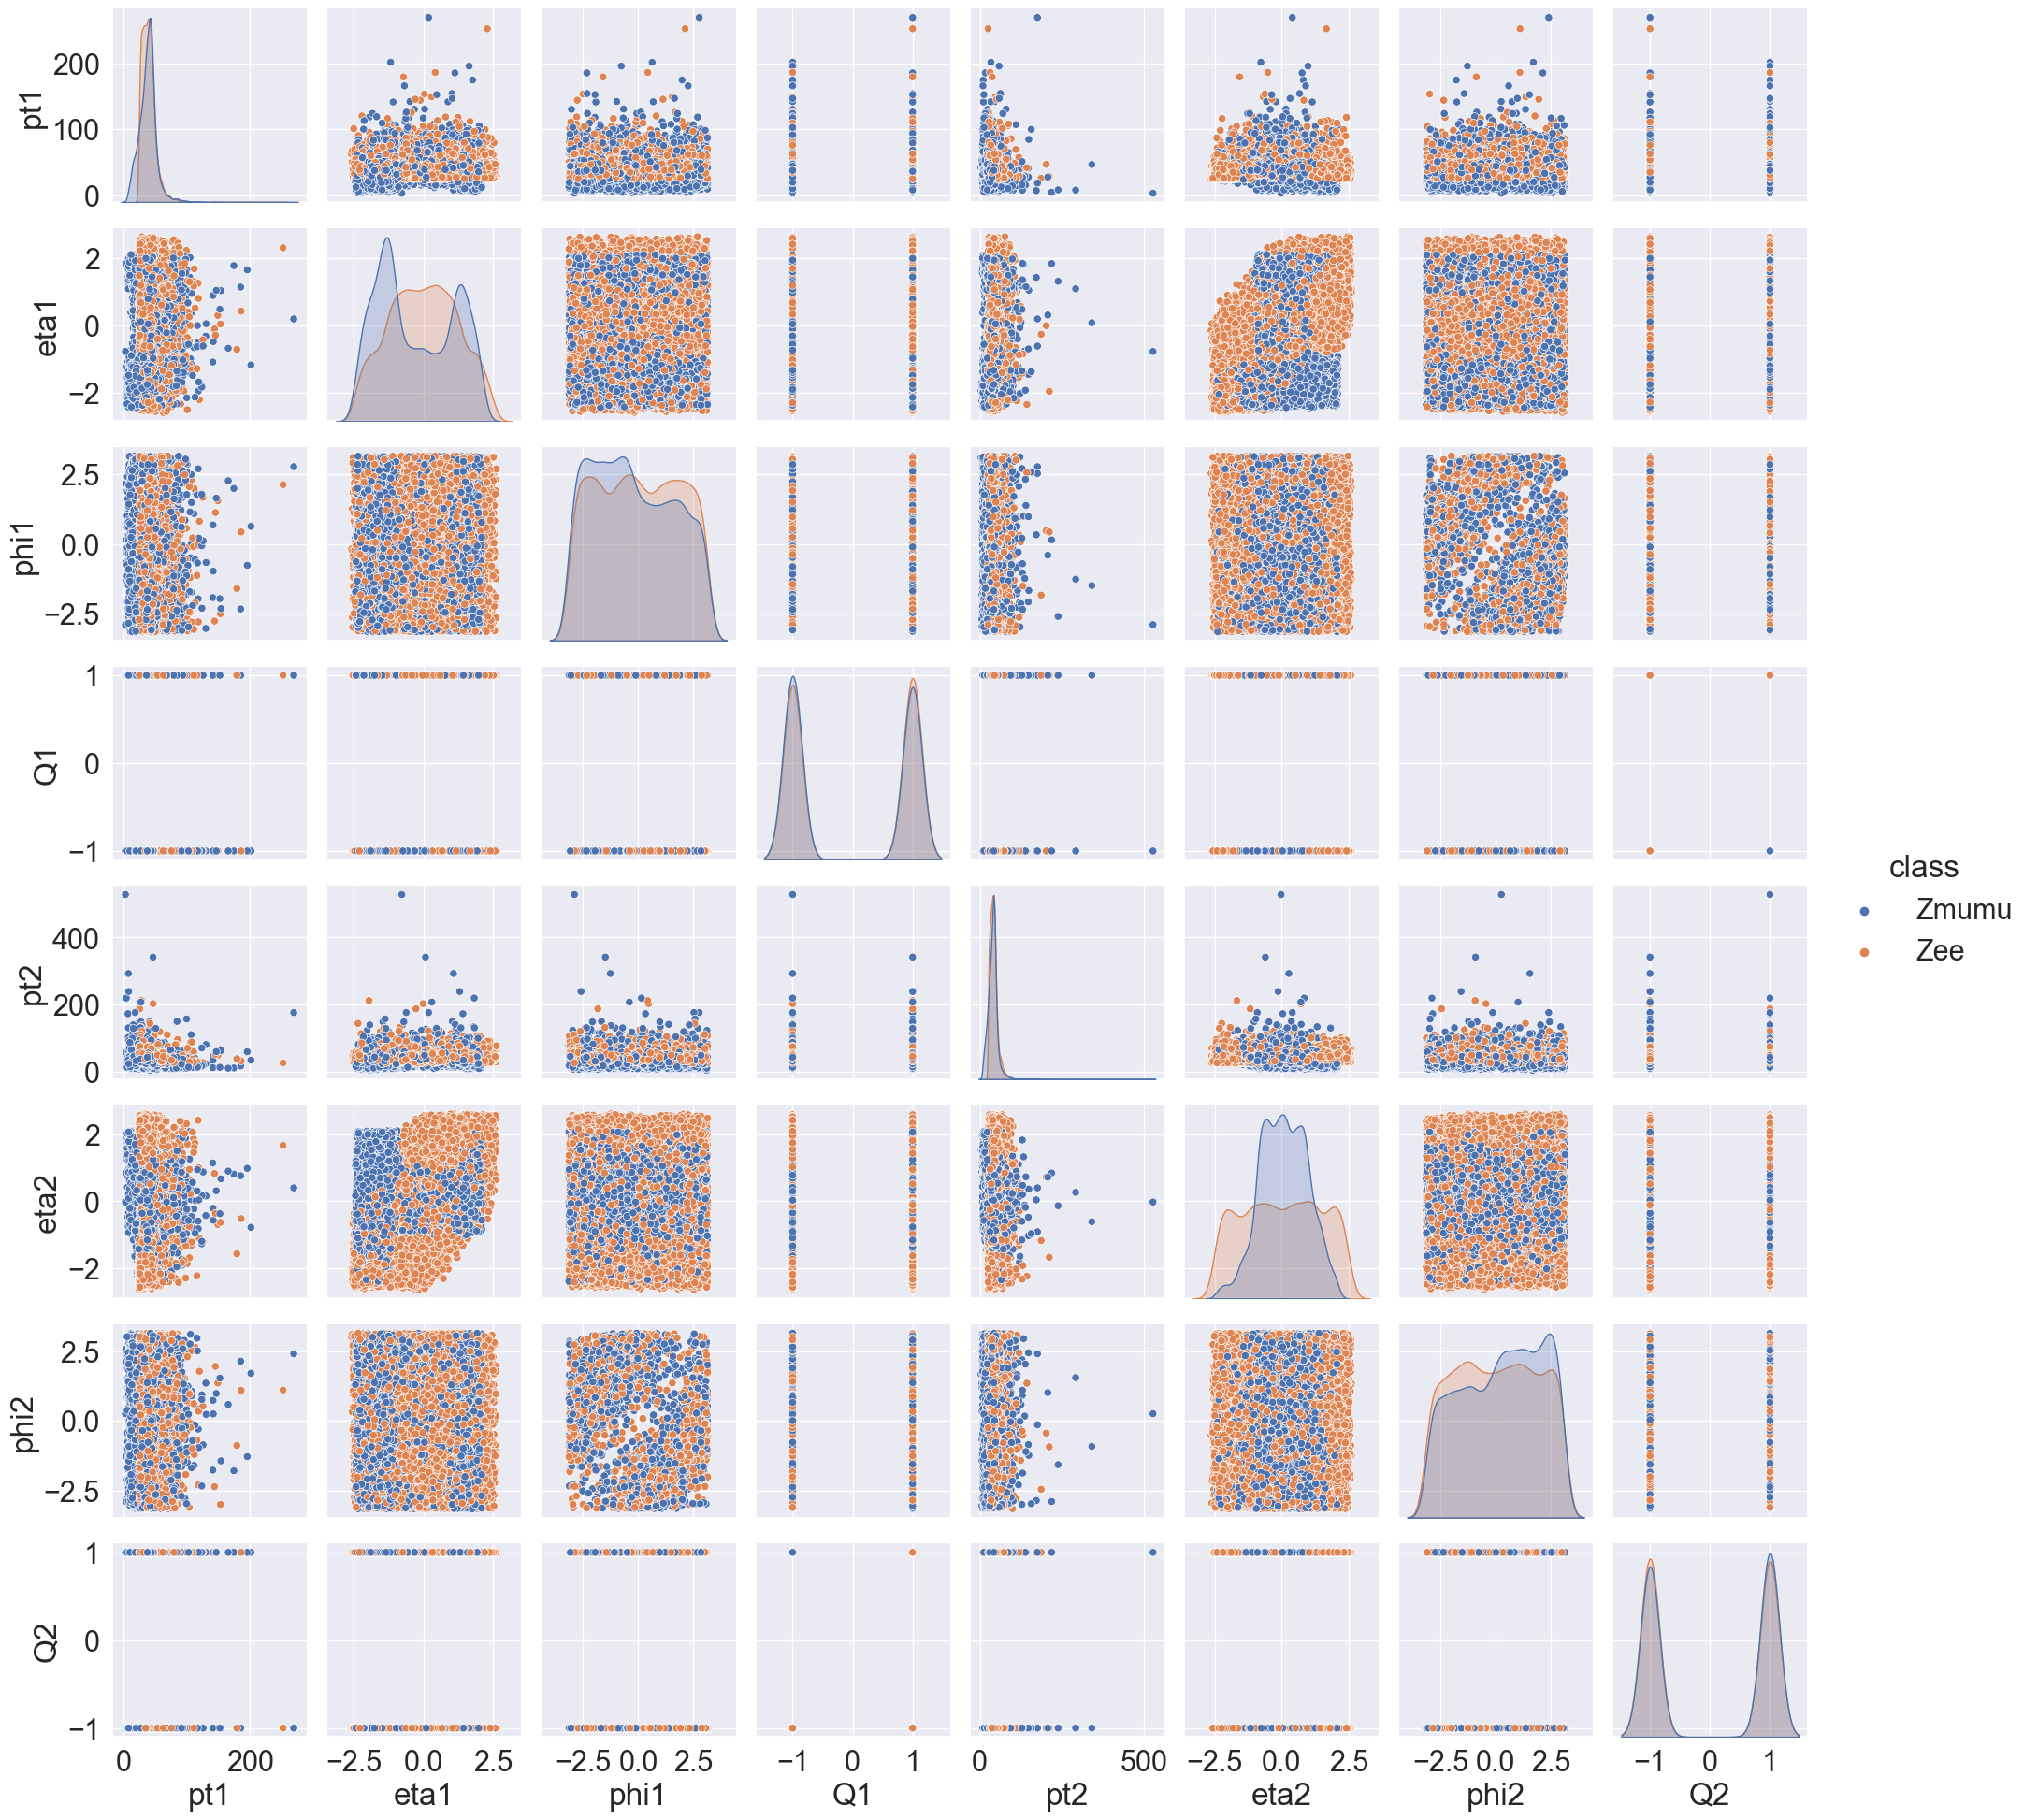

In [35]:
plt.figure(figsize=(20, 10))
sns.set_theme(font_scale=2.0)
sns.pairplot(data, hue="class", palette="deep")

Какие признаки вы бы использовали для разделения людей по классам? Выберите эти столбцы и создайте наборы train и test с помощью функции train_test_split, а также выделите набор данных для валидации при обучении.

In [36]:
# исходя из графиков, отберём признаки для обучения
selected_features = ['pt1', 'eta1', 'phi1', 'pt2', 'eta2', 'phi2']
X = data[selected_features]

In [37]:
# таргет преобразуем из строк "Zee", "Zmumu" к 0 и 1
lb = LabelBinarizer()
y = lb.fit_transform(data['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
X_val, X_test, y_val, y_test  = train_test_split(X_test, y_test, train_size=0.3)

## Общая часть

Как вы помните, в задаче классификации предсказывается вероятность. На основании этой вероятности можно делать вывод о принадлежности объекта к тому или иному классу. Причём не всегда используется порог $P=0.5$. Например, если классы несбалансированы, это значение можно варьировать на интервале (0, 1). Предоставляем вам возможность самим выбрать этот порог и поэкспериментировать.

In [42]:
class_lim_proba = sum(y) / len(y)

Стандартизируйте данные

In [43]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

Напишем функцию для отрисовки кривых обучения. На одном графике расположим значение функции потерь на трейне и валидации, а на другом &mdash; значение метрики качества на ваш выбор, также для трейна и валидации.

In [44]:
def plot_learning_curves(history):
    '''
    Функция для отображения лосса и метрики во время обучения.
    '''
    clear_output(wait=True)

    fig = plt.figure(figsize=(20, 7))
    fontsize = 15   # размер шрифта

    plt.subplot(1,2,1)
    plt.title('Лосс', fontsize=fontsize)
    plt.plot(history['loss_train'], label='train')
    plt.plot(history['loss_val'],   label='val')
    plt.ylabel('лосс',  fontsize=fontsize)
    plt.xlabel('эпоха', fontsize=fontsize)
    plt.legend()

    plt.subplot(1,2,2)
    plt.title('Метрика', fontsize=fontsize)
    plt.plot(history['metric_train'], label='train')
    plt.plot(history['metric_val'],   label='val')
    plt.ylabel('Значение метрики', fontsize=fontsize)
    plt.xlabel('эпоха',    fontsize=fontsize)
    plt.legend()
    plt.show()

Напишите функцию метрики, которую вы будете использовать, например accuracy.

In [93]:
def metric(y_true, y_pred):
  preds = y_pred >= class_lim_proba
  return sum(preds == y_true) / len(y_true)

#### Создание модели.
В семинаре вы у промежуточных слоёв задавали `in_features = out_features = 1`, а в данном случае вам надо будет создать нейросеть из нескольких слоёв, поставив только у последнего из них `out_features = 1`.

Какой должна быть размерность входа первого слоя?

In [94]:
model = nn.Sequential(
    nn.Linear(in_features=6, out_features=12),
    nn.ReLU(),
    nn.Linear(in_features=12, out_features=1),
    nn.Sigmoid()
    )

model

Sequential(
  (0): Linear(in_features=6, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=1, bias=True)
  (3): Sigmoid()
)

#### Обучение

В качетсве функции потерь возьмите [бинарную кросс-энтропию](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html), а шаг градиентного спуска установите равным 0.5. Можете взять и другие loss и `lr`, если хотите поэкспериментировать.

In [95]:
optim_func = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.5)

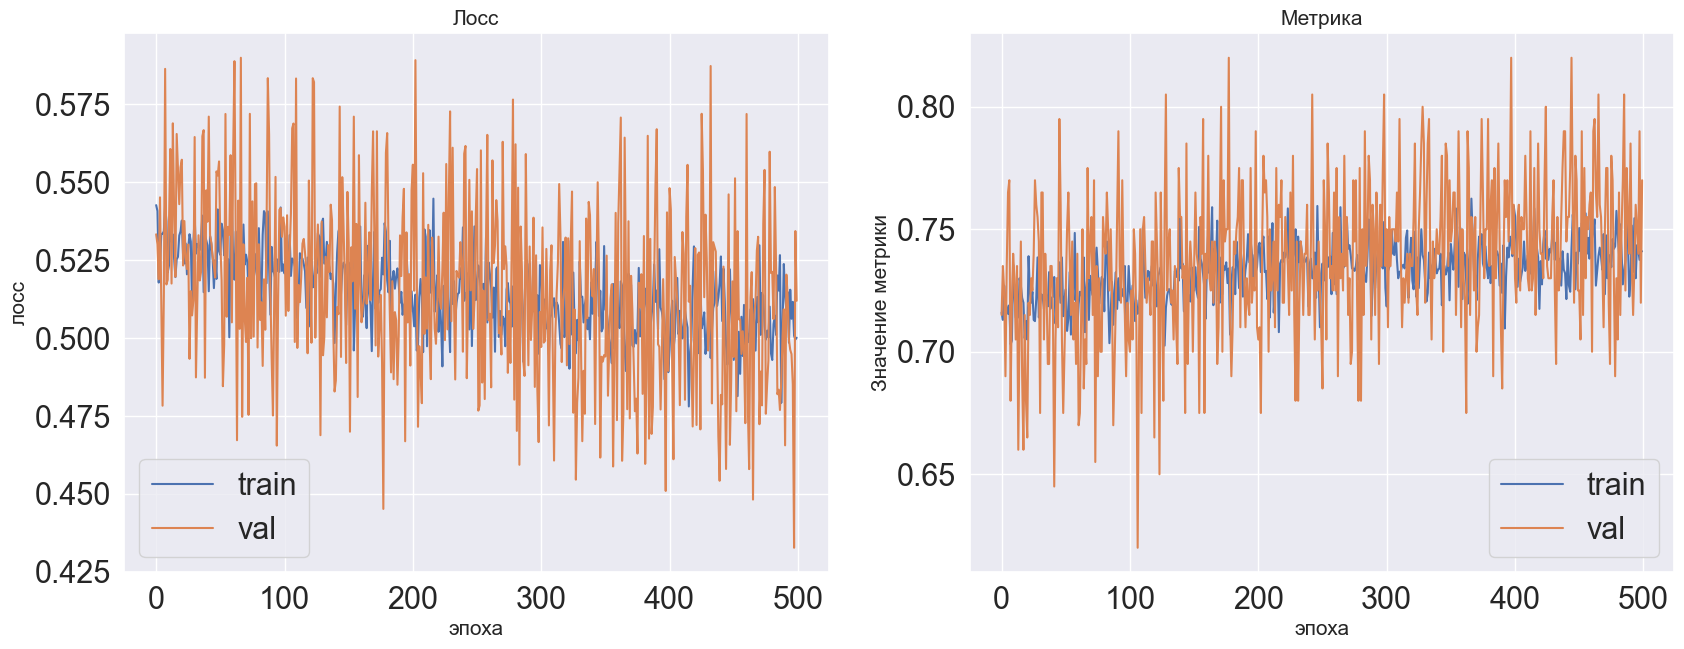

In [101]:
batch_size = 2000 # этот
num_iter = 500    # и этот параметры можете также поварьировать
history = {
    'loss_train': [],
    'loss_val': [],
    'metric_train': [],
    'metric_val': [],
}

for i in range(num_iter):
    
    # Так как размер выборки слишком велик, то будем обучать лишь на части данных
    indexes_train = np.random.choice(np.arange(len(X_train)), batch_size, replace=False)
    local_X_train = torch.FloatTensor(X_train[indexes_train])
    local_y_train = torch.FloatTensor(y_train[indexes_train])

    indexes_val = np.random.choice(np.arange(len(X_val)), batch_size // 10, replace=False)
    local_X_val = torch.FloatTensor(X_val[indexes_val])
    local_y_val = torch.FloatTensor(y_val[indexes_val])

    # Forward pass: предсказание модели по данным X_train
    y_pred_train = model(local_X_train)
    with torch.no_grad():
        y_pred_val = model(local_X_val)


    # Вычисление оптимизируемой функции (MSE) по предсказаниям
    loss_train = optim_func(y_pred_train, local_y_train)
    with torch.no_grad():
        loss_val = optim_func(y_pred_val, local_y_val)

    # Backward pass: вычисление градиентов оптимизируемой функции
    # по всем параметрам модели
    loss_train.backward()

    # Оптимизация: обновление параметров по формулам соответствующего
    # метода оптимизации, используются вычисленные ранее градиенты
    optimizer.step()

    # Зануление градиентов
    optimizer.zero_grad()
    
    # Считаем метрику на эпохе (здесь посчитана acuracy, можете реализовать любую другую за доп. баллы)
    metric_train = metric(local_y_train.detach().numpy(), y_pred_train.detach().numpy())
    metric_val = metric(local_y_val.detach().numpy(), y_pred_val.detach().numpy())
    # Сохраняем результаты эпохи
    history['loss_train'].append(loss_train.item())
    history['loss_val'].append(loss_val)
    history['metric_train'].append(metric_train)
    history['metric_val'].append(metric_val)

    # График Метрики + Лосса для трейна и валидации каждую итерацию
    plot_learning_curves(history)

Тестирование

In [102]:
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

with torch.no_grad():
      y_pred_test = model(X_test)
      loss_test = optim_func(y_pred_test, y_test)
      metric_test = metric(y_test.detach().numpy(), y_pred_test.detach().numpy())
print(f" Test Loss: {loss_test} \n Test metric: {metric_test}")

 Test Loss: 0.504568874835968 
 Test metric: [0.7402381]


**Выводы:** Видим, как помогает предобработка данных -- она помогла значительно уменьшить датасет, убрав оттуда "неперспективные" признаки ещё до обучения модели.

---
## <b><font color="orange">Сложная часть</font></b>
### Задача 3

В этой задаче мы будем вручную реализовывать усложнение для линейной регрессии, которое вы рассматривали на семинаре. 

Запрещено использовать torch.nn (саму библиотеку torch использовать можно и нужно). Чтобы иметь перед глазами оставим здесь формулы:

$$\widehat{y}(x) = w_1u(x) + b_1,$$

$$u(x) = \sigma(w_0x + b_0),$$

$$\sigma(x) = \text{ReLU}(x) = \begin{equation*}\begin{cases}x, \; x \ge 0, \\ 0, \; \text{иначе,} \end{cases} \end{equation*}$$

$w_0, b_0 \in \mathbb{R}$ &mdash; обучаемые параметры первого слоя, $w_1, b_1 \in \mathbb{R}$ &mdash; обучаемые параметры второго слоя, $\sigma(x)$ &mdash; функция активации, в данном случае мы выбрали `ReLU`.

Реализуйте функцию активации:

In [103]:
def act_func(x):
    return torch.max(x, torch.zeros_like(x))

Задайте оптимизируемую функцию / функцию ошибки / лосс — [MSE](https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества):

$$
    MSE(\widehat{y}, y) = \frac{1}{n}\sum_{i=1}^n\left(\widehat y_i - y_i\right)^2
$$

In [104]:
def optim_func(y_pred, y_true):
    return torch.mean((y_pred - y_true) ** 2)

In [121]:
def load_boston(file_path='boston.csv'):
    # выделяем признаки и таргет
    raw_df = pd.read_csv(file_path)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    return data, target

data, target = load_boston()

In [122]:
x = torch.FloatTensor(data[:, -1]/10).reshape(-1, 1)
y = torch.FloatTensor(target).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [123]:
def show_progress(x, y, y_pred, loss):
    '''
    Визуализация процесса обучения.

    x, y -- объекты и таргеты обучающей выборки;
    y_pred -- предсказания модели;
    loss -- текущее значение ошибки модели.
    '''

    # Открепим переменную от вычислительного графа перед отрисовкой графика
    y_pred = y_pred.detach()
    y=y.detach()

    # Превратим тензор размерности 0 в число
    loss = loss.item()

    # Стираем предыдущий вывод в тот момент, когда появится следующий
    clear_output(wait=True)

    # Строим новый график
    plt.figure(figsize=(10, 7))
    plt.scatter(x, y, alpha=0.75)
    plt.scatter(x, y_pred, color='orange', linewidth=5)
    plt.xlabel('% населения с низким уровнем дохода')
    plt.title('Медианная стоимость домов в тыс. $')
    plt.show()

    print(f"MSE = {loss:.3f}")

Обучите вашу модель на датасете с семинарского задания. Сравните полученный результат с результатом семинара.

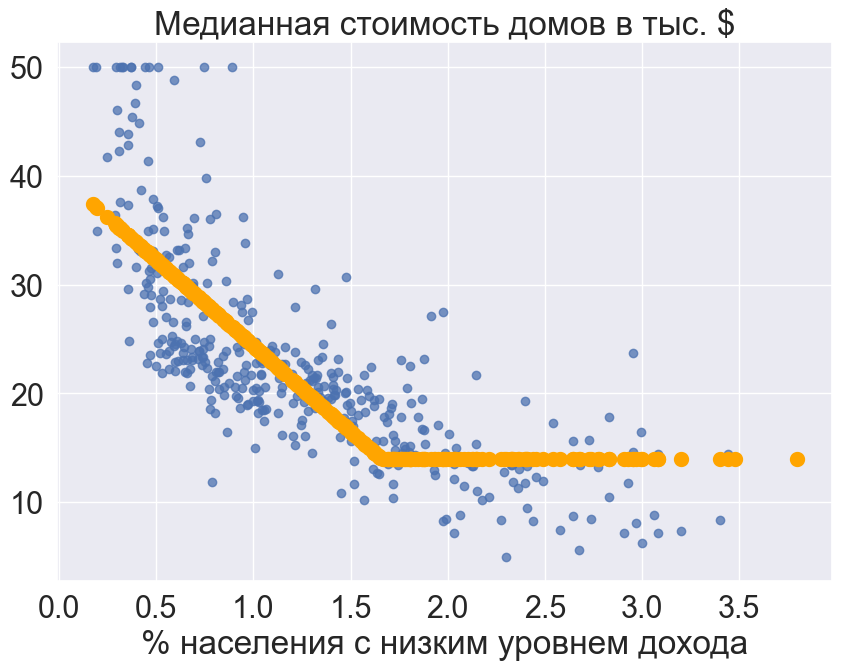

MSE = 33.557


In [124]:
# Инициализация параметров
w0 = torch.randn(1,requires_grad=True)
b0 = torch.randn(1,requires_grad=True)
w1 = torch.randn(1,requires_grad=True)
b1 = torch.randn(1,requires_grad=True)

# Количество итераций
num_iter = 1000

# Скорость обучения для параметров
lr_w = 0.01
lr_b = 0.05

for i in range(num_iter):

    # Forward pass: предсказание модели
    y_pred = w1 * act_func(w0 * X_train + b0) + b1

    # Вычисление оптимизируемой функции (MSE)
    loss = optim_func(y_pred, y_train)
    # Bakcward pass: вычисление градиентов
    loss.backward()

    # Оптимизация: обновление параметров
    w0.data -= lr_w * w0.grad
    b0.data -= lr_b * b0.grad
    w1.data -= lr_w * w1.grad
    b1.data -= lr_b * b1.grad

    # Зануление градиентов
    w0.grad.zero_()
    b0.grad.zero_()
    w1.grad.zero_()
    b1.grad.zero_()
    
    if (i + 1) % 10 == 0:
        show_progress(X_train, y_train, y_pred, loss)

In [125]:
print(f'MSE score: {optim_func(w1 * act_func(w0 * X_test + b0) + b1, y_test)}')

MSE score: 29.27121353149414


**Вывод:** И правда получилось похоже на сделанную ранее нейронку

---
### Задача 4

Рассмотрим двуслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронку можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$





**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

...

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.


**2.1.** Начнем с производной MSE по выходам сети:
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = \; ...$$

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = \; ...$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = \; ...$$

Также выпишем производные выходов сети по входам последнего слоя:

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = \; ...$$

Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{2h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_2}$$

$$\frac{\partial\:\text{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial u_h}$$

**2.3.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$:

$$\frac{\partial\:\sigma(x)}{\partial x} = \; ...$$

Теперь возьмем производные выходов первого слоя по его параметрам:

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \; ...$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \; ...$$

Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_{1h}}$$

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

...

**Вывод:**

...